In [6]:
import pandas as pd
import numpy as np
import os

# Change directory to project root directory
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

from utils.model.model_manager import ModelManager

# Get absolute paths
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "BTCUSDT_15m_1h-pump05_170715_250302.csv")

# Load historical data
df = pd.read_csv(data_path, parse_dates=["timestamp"])

# Show the first few rows
df.head()

Changed working directory to: /Users/oliulv/Documents


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061,9.0,0.489061,2089.104962,0,...,NaN,0.287683,0.004477,0.223411,NaN,NaN,NaN,-0.553177,NaN,0.586207
1,2017-08-17 04:15:00,4261.48,4270.41,4261.32,4261.45,9.119865,40.0,3.447113,14703.934995,0,...,NaN,0.607662,0.002133,0.377979,NaN,NaN,NaN,-0.244043,NaN,0.586207
2,2017-08-17 04:30:00,4280.00,4310.07,4267.99,4310.07,21.923552,58.0,20.421317,87620.977876,0,...,NaN,13.593956,0.009763,0.931478,NaN,NaN,NaN,0.862957,NaN,0.586207
3,2017-08-17 04:45:00,4310.07,4313.62,4291.37,4308.83,13.948531,64.0,10.803012,46538.460109,0,...,NaN,3.434413,0.005164,0.774491,NaN,NaN,NaN,0.548982,NaN,0.586207
4,2017-08-17 05:00:00,4308.83,4328.69,4304.31,4304.31,5.101153,44.0,3.496635,15093.783057,0,...,NaN,2.179243,0.005664,0.685460,NaN,NaN,NaN,0.370919,NaN,0.586207


In [7]:
# Initialize our ModelManager
symbol = "BTCUSDT"
start_date = "2017-07-15"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(custom_path=data_path)

# Split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(             open       high        low      close      volume  num_trades  \
 0         4261.48    4280.56    4261.48    4261.48    2.189061         9.0   
 1         4261.48    4270.41    4261.32    4261.45    9.119865        40.0   
 2         4280.00    4310.07    4267.99    4310.07   21.923552        58.0   
 3         4310.07    4313.62    4291.37    4308.83   13.948531        64.0   
 4         4308.83    4328.69    4304.31    4304.31    5.101153        44.0   
 ...           ...        ...        ...        ...         ...         ...   
 260918  105320.00  105320.01  105079.20  105094.56   72.302480     20410.0   
 260919  105094.57  105240.00  105049.94  105070.91   89.283780     25986.0   
 260920  105070.91  105254.00  105070.90  105202.44   45.951790     12236.0   
 260921  105202.44  105202.45  104980.00  104980.00   98.418980     15201.0   
 260922  104980.01  104980.01  104693.82  104722.94  161.845070     22550.0   
 
         taker_buy_base  taker_buy_quote    1m_roc

In [8]:
# Configure model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.5, min_precision=0.5)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.8008


np.float64(0.8007585358377024)

In [9]:
# Get and print model performance metrics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.8008
AUC-ROC Score: 0.9974

Overall Metrics:
Accuracy:  0.9764
Precision: 0.9770
Recall:    0.9764
F1-Score:  0.9727

Class 0 Metrics:
Precision: 0.9758
Recall:    1.0000
F1-Score:  0.9878

Class 1 Metrics:
Precision: 1.0000
Recall:    0.5108
F1-Score:  0.6762

Using raw probabilities
Classification threshold: 0.8008
{'accuracy': 0.9763970843457133, 'precision': 0.9769682581053188, 'recall': 0.9763970843457133, 'f1': 0.9727202022573566, 'auc_roc': np.float64(0.9973867732947121), 'optimal_threshold': np.float64(0.8007585358377024), 'precision_0': 0.9758007117437723, 'recall_0': 1.0, 'f1_0': 0.9877521613832853, 'precision_1': 1.0, 'recall_1': 0.5107913669064749, 'f1_1': 0.6761904761904762}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


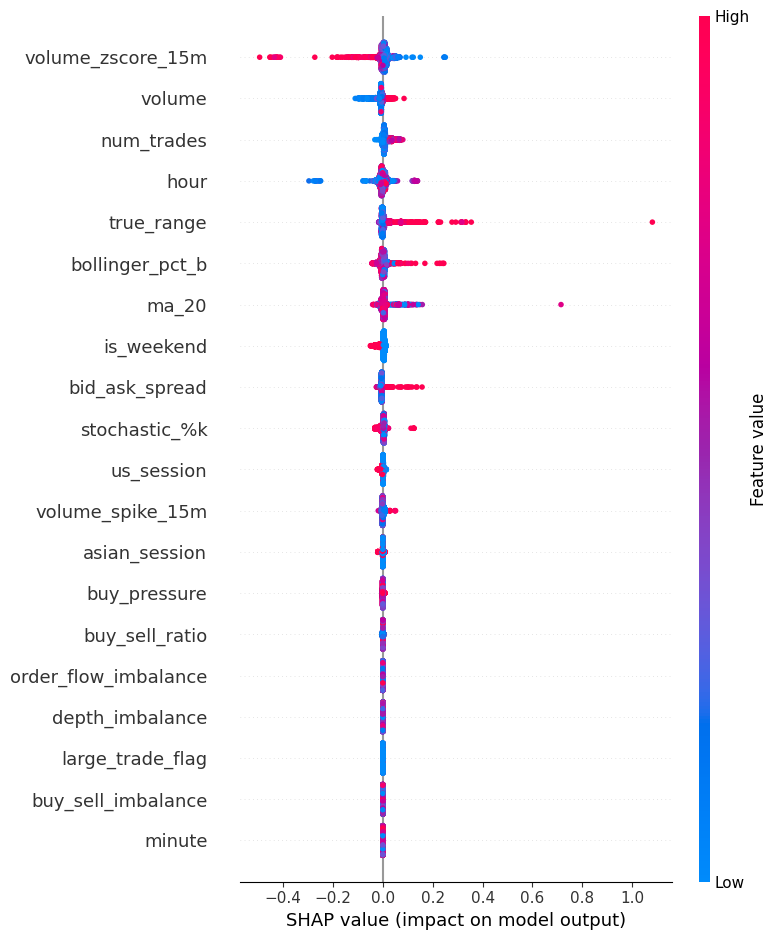


📈 Calculating feature importance...


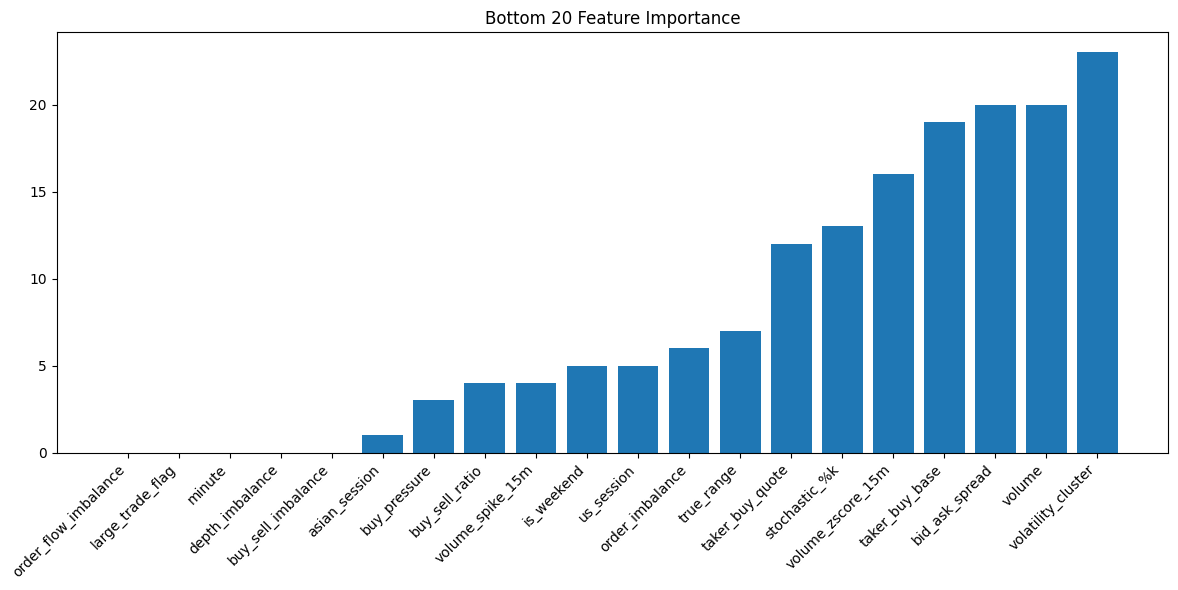

Found existing experiment
Identical result already exists for experiment ID: 9
Logged feature importance for experiment ID: 9


In [10]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="15m",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store original params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    initial_train_ratio=0.3,
    step_ratio=0.07,
    threshold=manager.optimal_threshold)

# Config new model for wf
manager.configure_walk_forward_model()

# Prepare features and labels
X = manager.df.drop(["label"], axis=1)
y = manager.df["label"]

# wf validation
predictions, true_labels, metrics_history = wf.validate(
    model=manager.model,
    X=X,
    y=y)

In [ ]:
# plot metrics over time
wf.plot_metrics_over_time()

In [ ]:
# Initialize Experiment Tracker
from utils.model.experiment_tracker import ExperimentTracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="15m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)